# Исследование закономерностей, определяющих успех игры

# Задача
Из открытых источников доступны исторические данные за 2016 год о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности.

# План
**1. Проведение обзора данных.**

**2. Проведение предобработки данных.**

**3. Проведение исследовательского анализа данных.**
- Посмотрим, сколько игр выпускалось в разные годы.
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
- Возьмем данные за соответствующий актуальный период.
- Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам.

**4. Составление портрета пользователя каждого региона.**

**5. Проверка гипотез.**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

**6. Выводы.**

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games_data = pd.read_csv('/datasets/games.csv')
games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В некоторых столбцах есть пропуски.

Также нужно привести названия столбцов к нижнему регистру и привести данные к нужным типам.

## Предобработка данных

### Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
games_data = games_data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release',\
                                        'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales',\
                                        'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score',\
                                        'User_Score': 'user_score', 'Rating': 'rating'})
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработаем пропуски

In [5]:
# Определим, в каких столбцах есть пропуски
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
# Посчитаем долю пропусков по столбцам
games_data.isna().sum() / len(games_data)

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [7]:
# В столбце name - название игры, 269 пропусков. Заменим их на значение "Неизвестно"
games_data['name'] = games_data['name'].fillna(value='Неизвестно')

In [8]:
# В столбце year_of_release - год выпуска, 269 пропусков. Удалим эти строки
games_data = games_data.loc[games_data['year_of_release'].isna() == False]
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
# В столбце genre - жанр игры, 2 пропуска. Заменим их на значение "Неизвестно"
games_data['genre'] = games_data['genre'].fillna(value='Неизвестно')

In [10]:
# В столбце critic_score - оценка критиков, очень много пропусков, 50%
# заменим их на значение -1, чтобы выделить в отдельную группу
games_data['critic_score'] = games_data['critic_score'].fillna(value=-1)

In [11]:
# В столбце user_score - оценка пользователей, очень много пропусков, 40%, заменим их на значение -1
# Значение tbd - "уточняется" заменим на значение -2
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = -2
games_data['user_score'] = games_data['user_score'].fillna(value=-1)

In [12]:
# В столбце rating - рейтинг от организации ESRB, очень много пропусков, 40%, заменим их на значение "Неизвестно"
games_data['rating'] = games_data['rating'].fillna(value="Неизвестно")

In [13]:
games_data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Преобразуем данные в нужные типы

Приведем столбец year_of_release - год выпуска к типу int, т.к. год это целое число.

Приведем столбец critic_score - оценка критиков (максимум 100) к типу int, т.к. оценка задется от 0 до 100 целым числом.

In [14]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  object 
 10  rating           16446 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
games_data['year_of_release'] = games_data['year_of_release'].astype('int')
games_data['critic_score'] = games_data['critic_score'].astype('int')
games_data['user_score'] = games_data['user_score'].astype('float')

In [16]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [17]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Неизвестно,31.38


### Проверим данные на наличие дубликактов

In [18]:
games_data.duplicated().sum()

0

In [19]:
games_data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
games_data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'Неизвестно'], dtype=object)

In [21]:
games_data['rating'].unique()

array(['E', 'Неизвестно', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Дубликатов не обнаружили.

**Промежуточные выводы**

- В столбцах critic_score, user_score и rating обнаружилось много пропусков по 40-50%. Такие пропуски мы обозначили как -1 и "Неизвестно", чтобы при исследовании данных они были выделены в отдельную группу.
- Преобразовали некоторые типы данных.
- Привели столбцы к нижнему регистру.
- Дубликаты не обнаружили.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

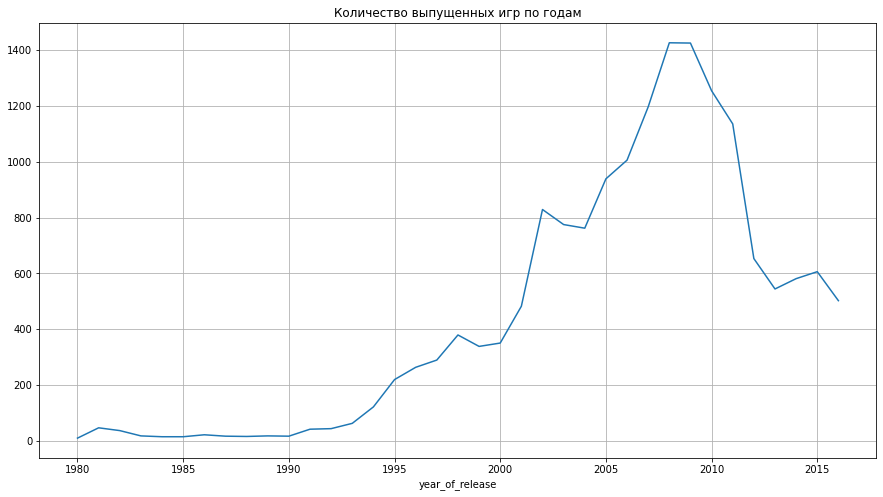

In [22]:
number_of_games_by_year = games_data.groupby('year_of_release')['name'].count()
number_of_games_by_year.plot(figsize=(15,8), grid=True, title='Количество выпущенных игр по годам');

С каждым годом количество игр менялось. С 1980 по 1993 год выпускалось мало игр - от 9 до 62. Далее с каждым годом выпускалось все больше игр до 2009 года - до 1427 игр. Затем пошел спад примерно до 600 игр в год.

Для исследования возьмем данные начиная с 2012 года.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [23]:
# Посмотрим на 5 платформ с самыми высокими продажами
platform_sales_by_year = games_data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales_by_year.head(5)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


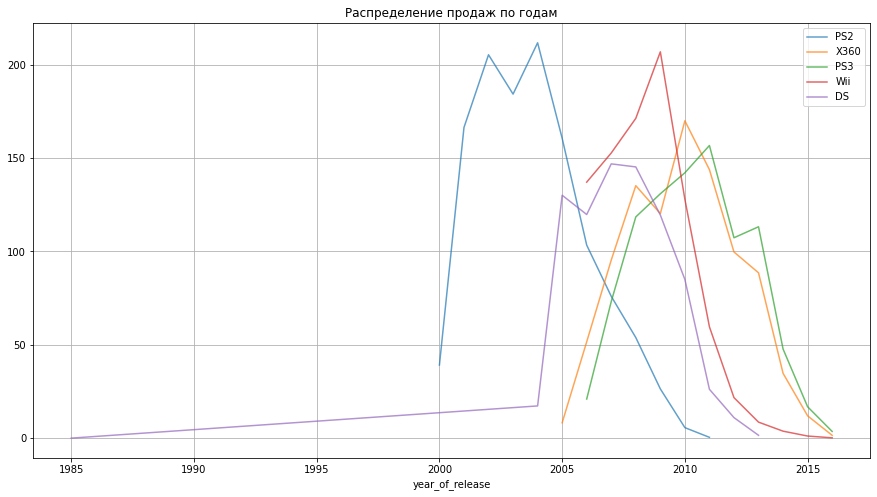

In [24]:
# Для каждой такой платформы построим грфик распределения продаж по годам
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
for i in range(0,5):
    games_data.loc[games_data['platform'] == platforms[i]].groupby('year_of_release')['total_sales'].sum().plot(figsize=(15,8), grid=True, title='Распределение продаж по годам', alpha=0.7)
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS']);

Все эти платформы существовали примерно в одно время, и у каждой примерно по 5 точек высоких продаж.

In [25]:
# Выясним сколько в среднем существует платформа
(games_data.groupby('platform')['year_of_release'].max() - games_data.groupby('platform')['year_of_release'].min() + 1).median()

7.0

В среднем платформа существует в течение 7 лет.

### Возьмем данные за соответствующий актуальный период

In [26]:
clean_games_data = games_data.query('year_of_release >= 2012')

Не учитываем в работе данные за предыдущие годы.

### Выберем несколько потенциально прибыльных платформ.

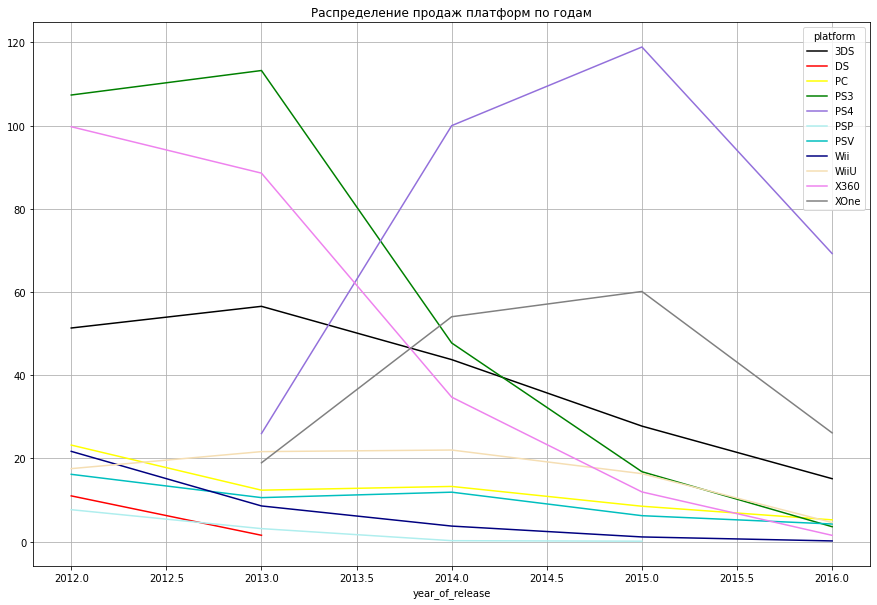

In [27]:
my_colors = ['black', 'red', 'yellow', 'green', 'mediumpurple', 'paleturquoise', 'c', 'navy', 'wheat', 'violet', 'gray']
clean_games_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,10), grid=True, title='Распределение продаж платформ по годам', alpha=1, color=my_colors);

По графику видно, что по продажам лидируют следующие платформы: PS3, PS4, X360, XOne, 3DS.

По сути у всех платформ продажи сначала растут, а потом падают, у кого-то резче, у кого-то плавнее.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [28]:
clean_games_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

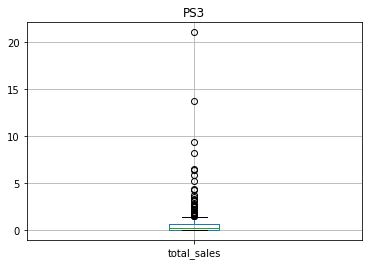

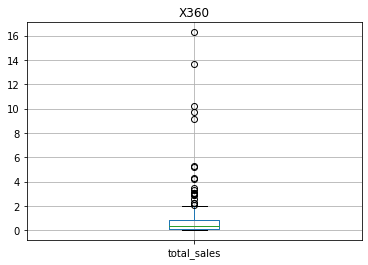

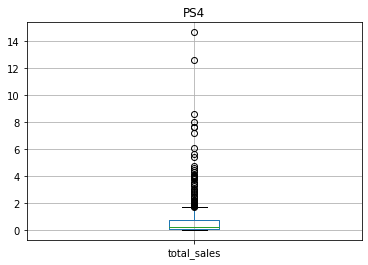

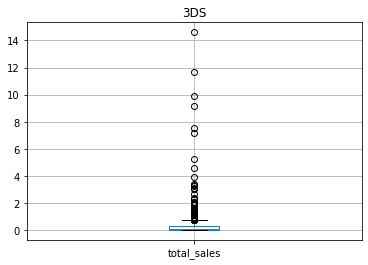

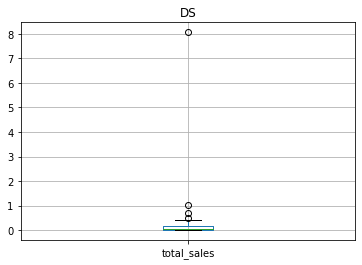

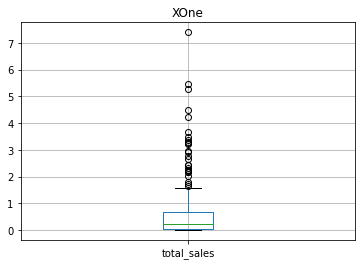

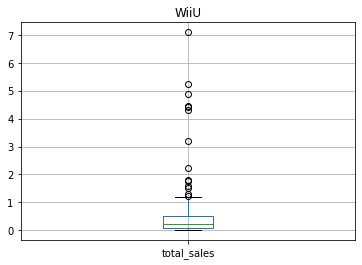

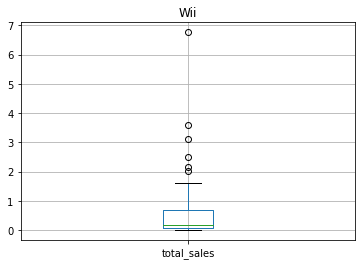

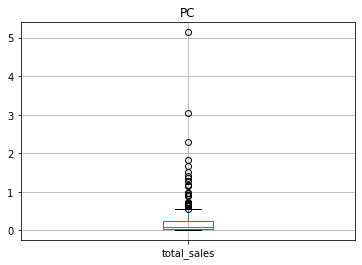

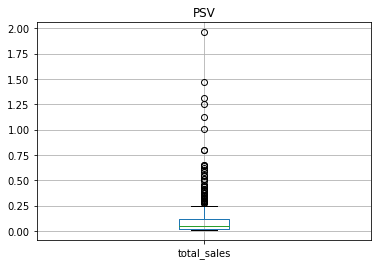

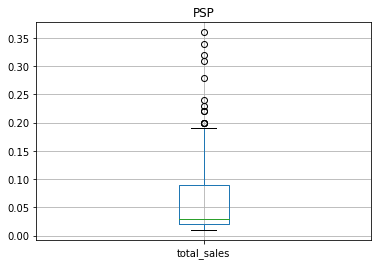

In [29]:
for i in clean_games_data['platform'].unique():
    plt.title(i)
    plt.show(pd.DataFrame(clean_games_data.loc[clean_games_data['platform'] == i, 'total_sales']).boxplot());
    

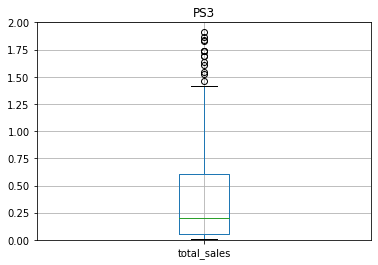

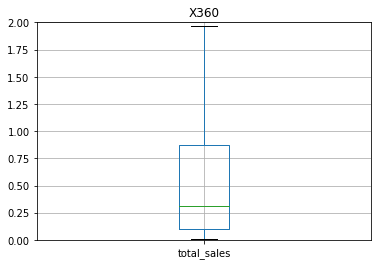

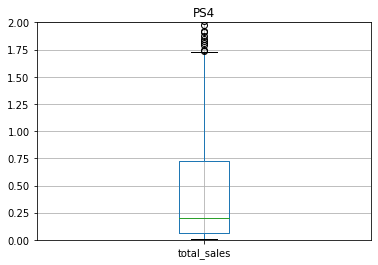

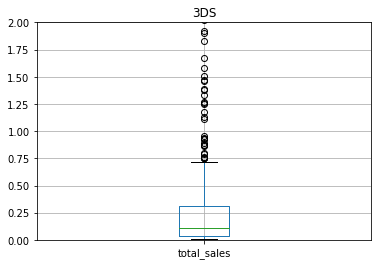

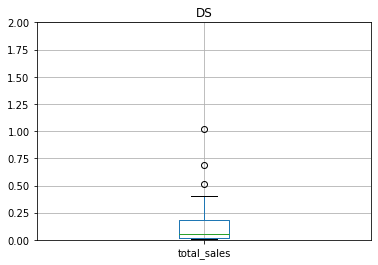

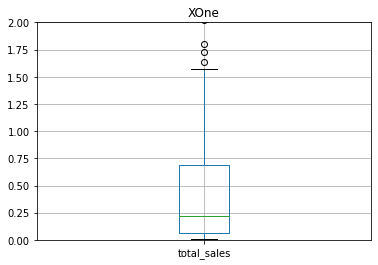

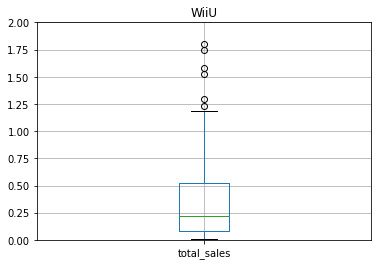

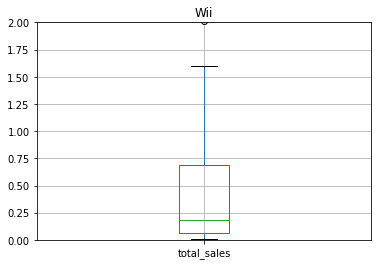

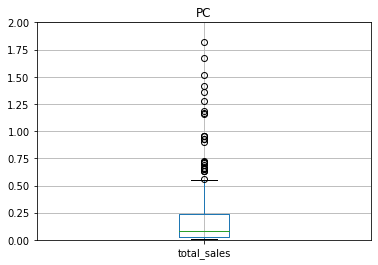

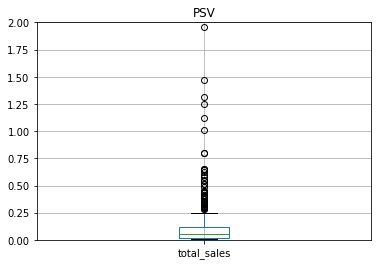

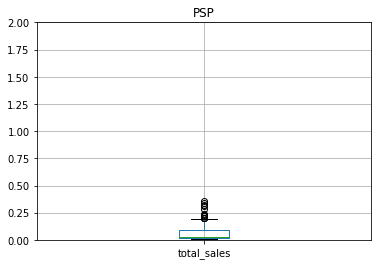

In [30]:
for i in clean_games_data['platform'].unique():
    plt.title(i)
    plt.ylim([0,2])
    plt.show(pd.DataFrame(clean_games_data.loc[clean_games_data['platform'] == i, 'total_sales']).boxplot());

По графикам видно, что для всех топ-платформ характерное значение продаж для игр (медиана) от 0,03 до 0,3 млн. Самое высокое медианное значение у платформы X360.

Нормальные значения находятся в пределах от 0 до 2 млн. И опять же самый высокий показатель нормальных значений у платформы X360, а также у платформы PS4, XOne, Wii. А вот у платформ PSV и PSP показатели уже намного ниже, в пределах 0,25 млн.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

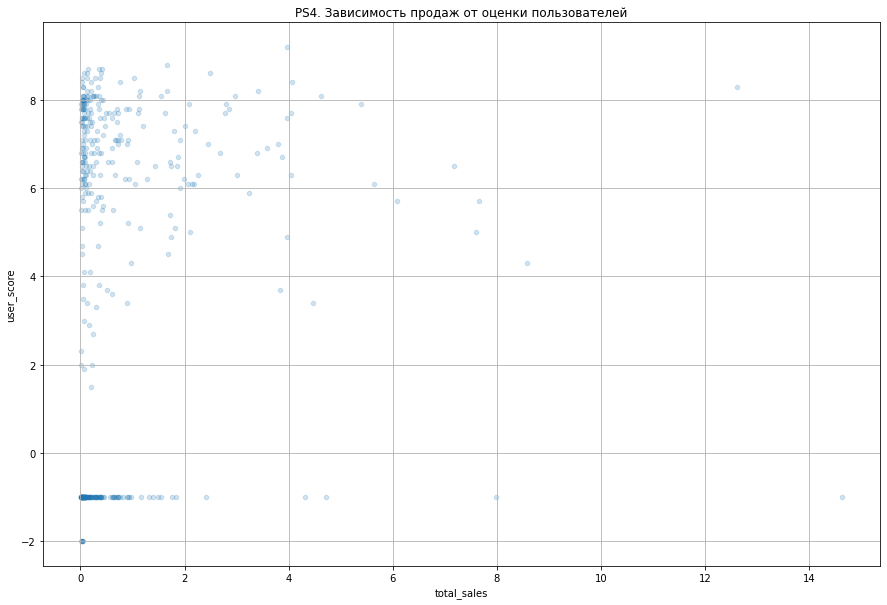

In [31]:
# Рассмотрим платформу PS4
clean_games_data.loc[clean_games_data['platform'] == 'PS4'].plot(x='total_sales', y='user_score', kind='scatter',\
                                                                 alpha=0.2, figsize=(15,10), grid=True,\
                                                                 title='PS4. Зависимость продаж от оценки пользователей');

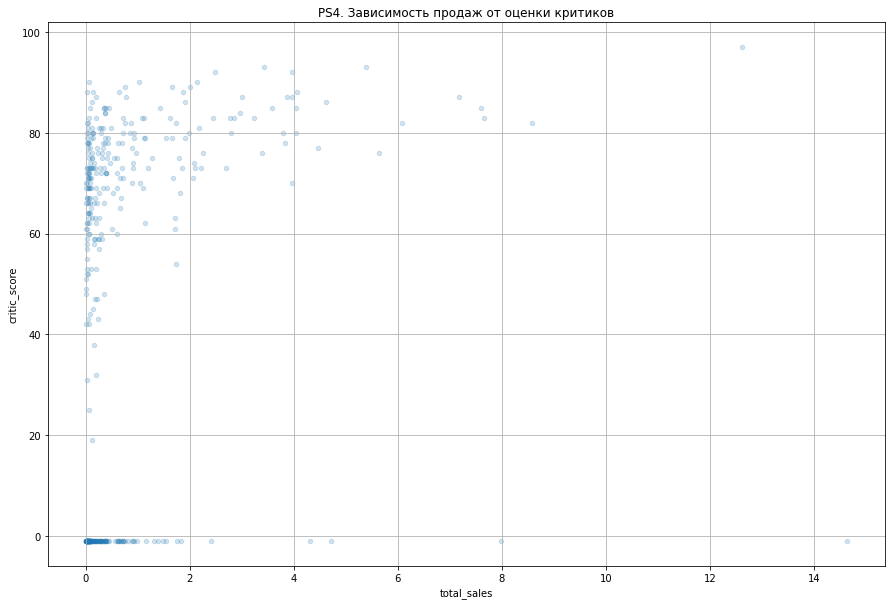

In [32]:
clean_games_data.loc[clean_games_data['platform'] == 'PS4'].plot(x='total_sales', y='critic_score', kind='scatter',\
                                                                 alpha=0.2, figsize=(15,10), grid=True,\
                                                                 title='PS4. Зависимость продаж от оценки критиков');

In [33]:
print(clean_games_data['total_sales'].corr(clean_games_data['critic_score']))
clean_games_data['total_sales'].corr(clean_games_data['user_score'])

0.2480102413897163


0.18378920295333098

По диаграммам рассеяния и коэффициенту корреляции видно, что есть слабая прямая зависимость между оценками критиков/пользователей и продажами.

### Соотнесем выводы с продажами игр на других платформах

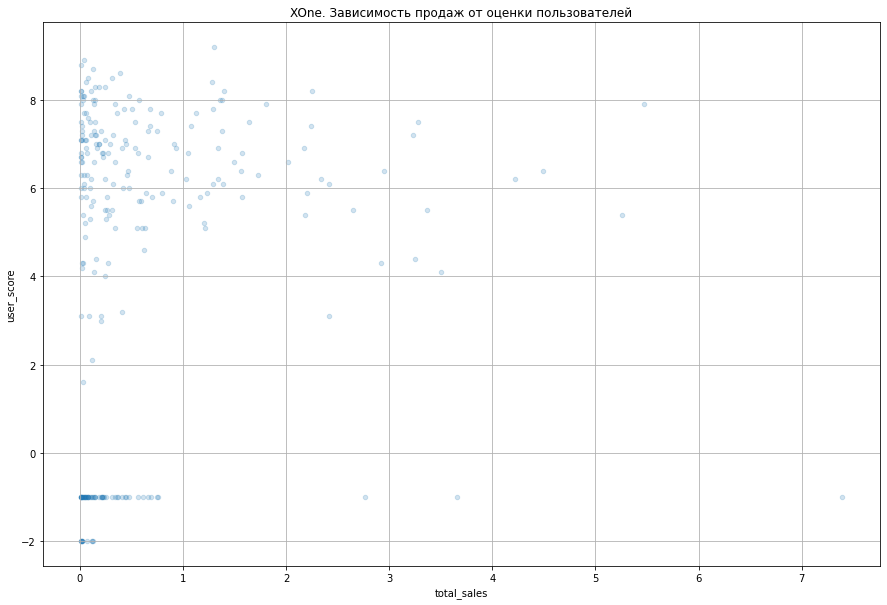

In [34]:
# Рассмотрим аналогичные графики еще для нескольких платформ
clean_games_data.loc[clean_games_data['platform'] == 'XOne'].plot(x='total_sales', y='user_score', kind='scatter', alpha=0.2,\
                                                                  figsize=(15,10), grid=True,\
                                                                  title='XOne. Зависимость продаж от оценки пользователей');

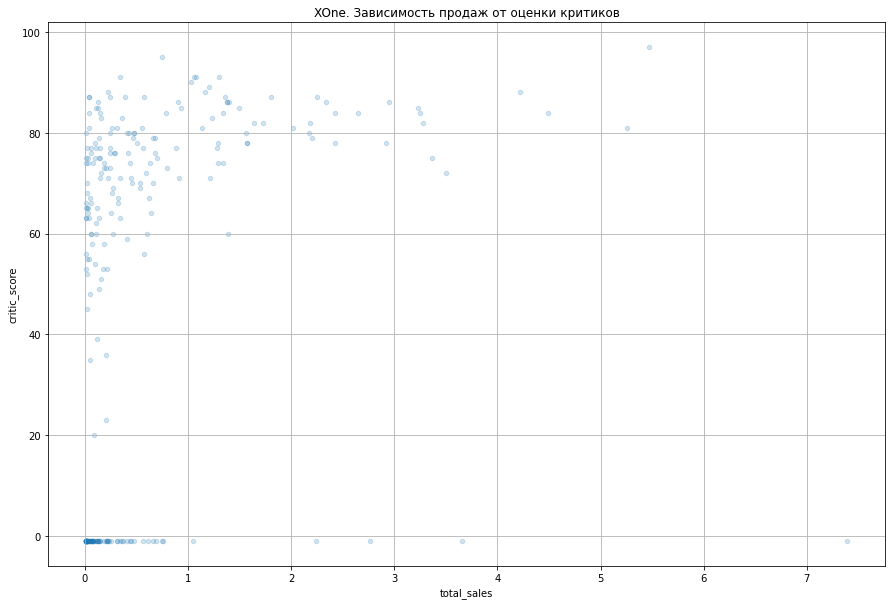

In [35]:
clean_games_data.loc[clean_games_data['platform'] == 'XOne'].plot(x='total_sales', y='critic_score', kind='scatter',\
                                                                  alpha=0.2, figsize=(15,10), grid=True,\
                                                                  title='XOne. Зависимость продаж от оценки критиков');

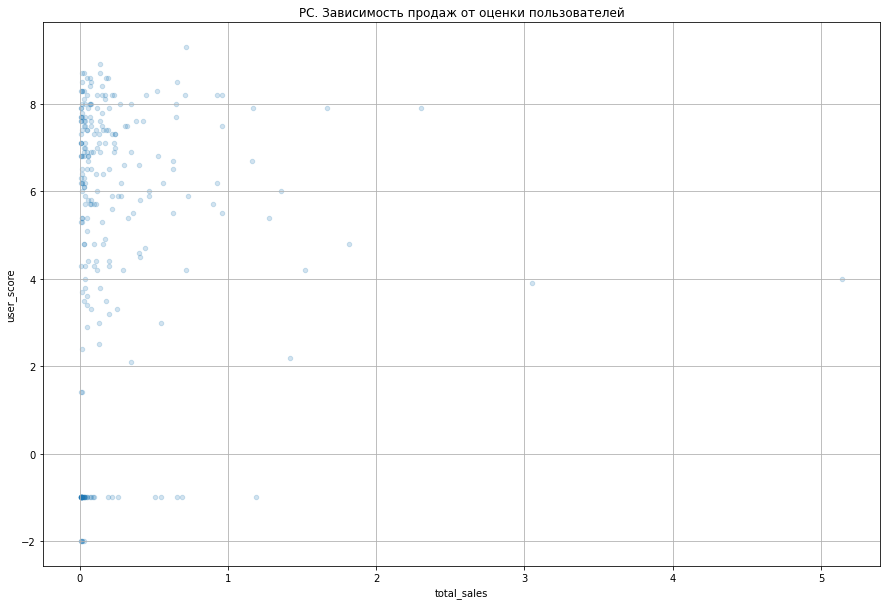

In [36]:
clean_games_data.loc[clean_games_data['platform'] == 'PC'].plot(x='total_sales', y='user_score', kind='scatter',\
                                                                alpha=0.2, figsize=(15,10), grid=True,\
                                                                title='PC. Зависимость продаж от оценки пользователей');

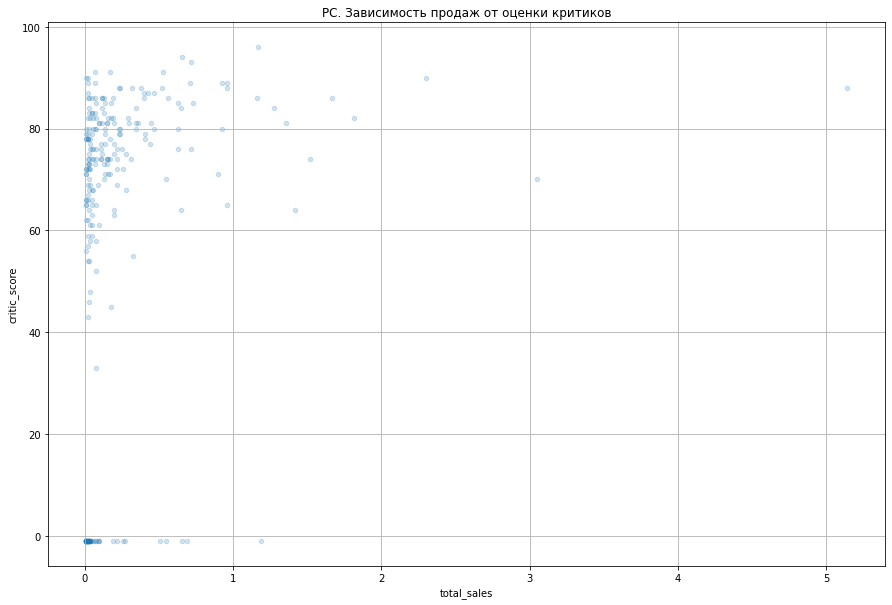

In [37]:
clean_games_data.loc[clean_games_data['platform'] == 'PC'].plot(x='total_sales', y='critic_score', kind='scatter',\
                                                                alpha=0.2, figsize=(15,10), grid=True,\
                                                                title='PC. Зависимость продаж от оценки критиков');

По графикам и коэффициенту корреляции можно сказать, что на других платформах также будет слабая зависимость продаж от оценок.

### Посмотрим на общее распределение игр по жанрам

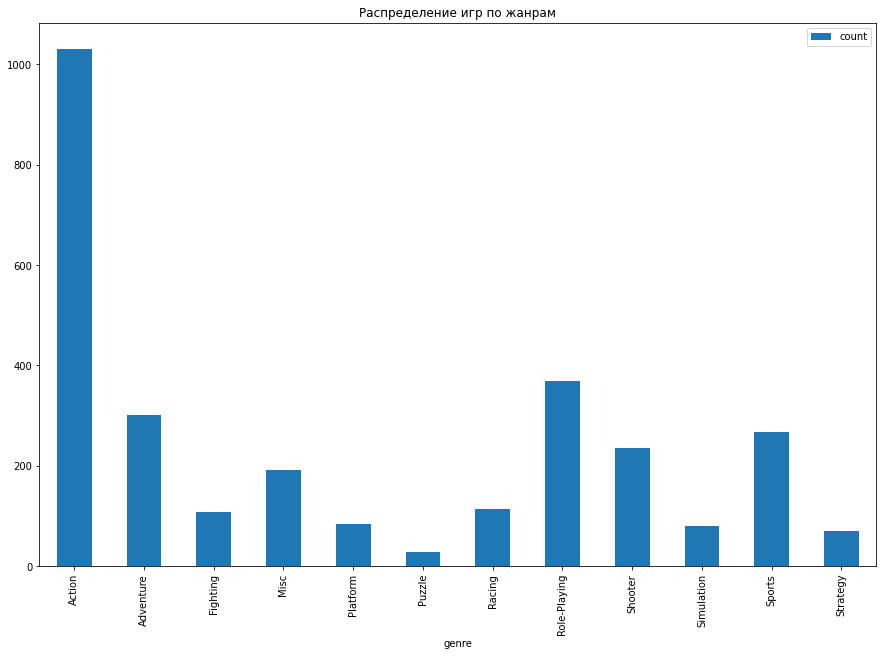

In [38]:
# Распределение игр по жанрам
genre_data = clean_games_data.pivot_table(index='genre', values='name', aggfunc='count').reset_index()
genre_data.columns = ['genre', 'count']
genre_data.plot(x='genre', y='count', kind='bar', figsize=(15,10), title='Распределение игр по жанрам');

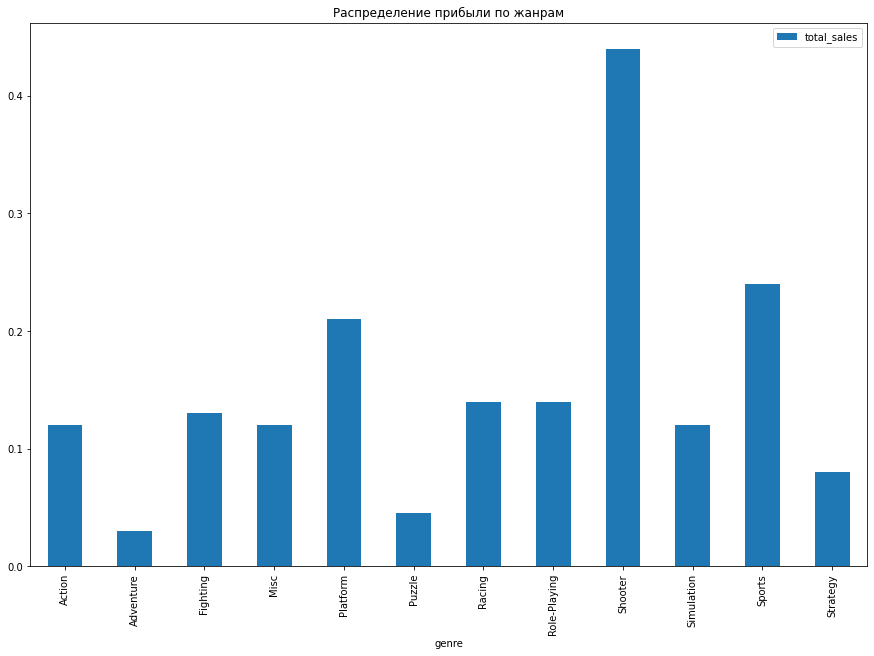

In [39]:
genre_sale_data = clean_games_data.pivot_table(index='genre', values='total_sales', aggfunc='median').reset_index()
genre_sale_data.plot(x='genre', y='total_sales', kind='bar', figsize=(15,10), title='Распределение прибыли по жанрам');

Больше всего игр в жанре Action. Затем идут Role-Playing, Adventure, Sports и Shooter. Меньше всего в жанрах Puzzle, Strategy, Fighting, Simelation, Platform и Racing.

Самые прибыльный жанр Shooter. Затем Sports и Platform. Самые непибыльные Adventure, Puzzle и Strategy.

Итак, больше всего выпускают игр в жанре Action, но прибыльность у него средняя, чуть больше 1 млн. Также выпускают достаточно много игр в жанре Role-Playing, и прибыльность у них тоже средняя.

Игр в жанре Adventure много, но прибыль у них самая низкая.

Игр в жанре Sports и Shooter среднее количество, и прибыль у них достаточно высокая.

У игр в жанре Platform достачно хорошая прибыль, а вот выпускают их мало.

## Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе/

In [40]:
# Самые популярные платформы в Северной Америке
#region_data = clean_games_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
na_sales_data = clean_games_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
na_sales_data = na_sales_data.merge(platform_sales_by_year, on='platform', how='left')
na_sales_data = na_sales_data.head()
na_sales_data['proportion'] = round(na_sales_data['na_sales'] / na_sales_data['total_sales'] * 100, 1)
na_sales_data

,platform,na_sales,total_sales,proportion
0,X360,140.05,961.24,14.6
1,PS4,108.74,314.14,34.6
2,PS3,103.38,931.34,11.1
3,XOne,93.12,159.32,58.4
4,3DS,55.31,257.81,21.5


In [41]:
# Самые популярные платформы в Европе
eu_sales_data = clean_games_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
eu_sales_data = eu_sales_data.merge(platform_sales_by_year, on='platform', how='left')
eu_sales_data = eu_sales_data.head()
eu_sales_data['proportion'] = round(eu_sales_data['eu_sales'] / eu_sales_data['total_sales'] * 100, 1)
eu_sales_data

,platform,eu_sales,total_sales,proportion
0,PS4,141.09,314.14,44.9
1,PS3,106.86,931.34,11.5
2,X360,74.52,961.24,7.8
3,XOne,51.59,159.32,32.4
4,3DS,42.64,257.81,16.5


In [42]:
# Самые популярные платформы в Японии
jp_sales_data = clean_games_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
jp_sales_data = jp_sales_data.merge(platform_sales_by_year, on='platform', how='left')
jp_sales_data = jp_sales_data.head()
jp_sales_data['proportion'] = round(jp_sales_data['jp_sales'] / jp_sales_data['total_sales'] * 100, 1)
jp_sales_data

,platform,jp_sales,total_sales,proportion
0,3DS,87.79,257.81,34.1
1,PS3,35.29,931.34,3.8
2,PSV,21.04,53.81,39.1
3,PS4,15.96,314.14,5.1
4,WiiU,13.01,82.19,15.8


В целом популярные платформы совпадают во всех трех регионах, за исключением Японии: там популярны платформы PSV, WiiU, а не XOne и X360.

Основная прибыль приходится на Северную Америку. На втором месте по прибыли Европа, на третьем Япония.

В Северной Америке больше всего любят XOne, в Европе - PS4, в Японии - PSV.

In [43]:
# Самые популярные жанры в Северной Америке
na_genre_data = clean_games_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
na_genre_data = na_genre_data.head()
na_genre_data

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


In [44]:
# Самые популярные жанры в Европе
eu_genre_data = clean_games_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
eu_genre_data = eu_genre_data.head()
eu_genre_data

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


In [45]:
# Самые популярные жанры в Японии
jp_genre_data = clean_games_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
jp_genre_data = jp_genre_data.head()
jp_genre_data

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


В Северной Америке и Европе предпочтение по жанрам полностью совпадает, там любят такие жанры как Action, Shooter, Sports, Role-Playing, Misc и Racing.

В Японии предпочтения несколько отличаются, больше всего там любят Role-Playing, а еще Simulation и Fighting. И также как в Америке и Европе Action и Misc.

In [46]:
# Влияните рейтинга на продажи
rating_data = clean_games_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
rating_data

,rating,eu_sales,jp_sales,na_sales
0,M,193.96,21.20,231.57
1,E,113.03,28.33,114.37
2,Неизвестно,91.50,108.84,103.31
3,E10+,55.37,8.19,75.70
4,T,52.96,26.02,66.02


Рейтинг определенно влияет на продажи, у рейтингов T и E10+ низкие показатели. У остальных рейтингов показатели продаж достаточно высокие. Но, следует обратить внимание, что на неизвестный рейтинг приходится очень много продаж, поэтому, если восстановить данные о рейтинге, картина для рейтингов T и E10+ может поменяться.

И в Европе, и в Северной Америке, и в Японии самые прибыльные рейтинг E, М и Неизвестная категоря.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем гипотезу:

H0: средние равны

H1: средние не равны

In [47]:
xone = clean_games_data.loc[(clean_games_data['platform'] == 'XOne') &\
                            (clean_games_data['user_score'] != -1) &\
                            (clean_games_data['user_score'] != -2), 'user_score'].reset_index()
pc = clean_games_data.loc[(clean_games_data['platform'] == 'PC') &\
                          (clean_games_data['user_score'] != -1) &\
                          (clean_games_data['user_score'] != -2), 'user_score'].reset_index()
xone_pc = xone.merge(pc, left_index=True, right_index=True, how='outer')
xone_pc.columns = ['index1', 'xone_user_score', 'index2', 'pc_user_score']
xone_pc['xone_user_score'] = xone_pc['xone_user_score'].fillna(value=xone_pc['xone_user_score'].median())
xone_pc

,index1,xone_user_score,index2,pc_user_score
0,165.0,7.9,192,4.0
1,179.0,5.4,458,3.9
2,242.0,6.4,688,7.9
3,270.0,6.2,959,4.8
4,373.0,4.1,1095,7.9
...,...,...,...,...
201,NaN,6.8,16463,6.8
202,NaN,6.8,16509,7.9
203,NaN,6.8,16518,1.4
204,NaN,6.8,16584,7.9


In [48]:
alpha = 0.05

results = st.ttest_ind(xone_pc['xone_user_score'], xone_pc['pc_user_score'], equal_var = False)

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.3953151345702436
Не получилось отвергнуть нулевую гипотезу


H0: 'средние равны' - не получилось отвергнуть.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем гипотезу:

H0: средние равны

H1: средние не равны

In [49]:
action = clean_games_data.loc[(clean_games_data['genre'] == 'Action') &\
                              (clean_games_data['user_score'] != -1) &\
                              (clean_games_data['user_score'] != -2), 'user_score'].reset_index()
sports = clean_games_data.loc[(clean_games_data['genre'] == 'Sports') &\
                              (clean_games_data['user_score'] != -1) &\
                              (clean_games_data['user_score'] != -2), 'user_score'].reset_index()
action_sports = action.merge(sports, left_index=True, right_index=True, how='outer')
action_sports.columns = ['index1', 'action_user_score', 'index2', 'sports_user_score']
action_sports['sports_user_score'] = action_sports['sports_user_score'].fillna(value=action_sports['sports_user_score'].median())
action_sports

,index1,action_user_score,index2,sports_user_score
0,16,8.2,77.0,4.3
1,23,8.1,94.0,5.0
2,42,8.3,126.0,4.3
3,81,6.6,143.0,5.7
4,127,6.9,264.0,4.5
...,...,...,...,...
518,16597,6.0,NaN,5.7
519,16652,8.5,NaN,5.7
520,16654,5.1,NaN,5.7
521,16660,6.7,NaN,5.7


In [50]:
results2 = st.ttest_ind(action_sports['action_user_score'], action_sports['sports_user_score'], equal_var = False)

# выведите на экран получившееся p-значение
print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.6187768804683573e-51
Отвергаем нулевую гипотезу


H0: 'средние равны' - отвергаем.

## Вывод

В ходе исследования нам удалось выяснить, что на успешность игры влияют следующие факторы:
- Самый прибыльный жанр Shooter. Затем Sports и Platform.
- Самые популярные платформы в Европе и Северной Америке PS4, PS3, X360, XOne, 3DS. В Японии - 3DS, PS3, PSV, PS4, WiiU.
- В Северной Америке и Европе предпочтения по жанрам полностью совпадают, там любят такие жанры как Action, Shooter, Sports, Role-Playing, Misc и Racing. В Японии больше всего любят Role-Playing, а еще Simulation и Fighting. И также как в Америке и Европе Action и Misc.
- И в Европе, и в Северной Америке, и в Японии самые прибыльные рейтинги E и М.
- Самые лучшие средние показатели продаж у платформ X360, PS4, XOne и Wii.